<a href="https://colab.research.google.com/github/L-Shyamal/ear-echo/blob/main/Ear_Echo/Ear_Echo(17_23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
#reading data from the stored CSV file
TF_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/17-23/TF Data/TF_Data.csv')
TF_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,720
0,1.720123,2.148951,1.908662,2.225510,2.150904,2.577200,2.507597,2.646531,2.819607,2.759231,...,1.416857,1.506122,1.553165,1.672926,1.444848,1.510595,1.587770,1.725333,1.839167,0.0
1,-1.241189,-0.829709,-1.515567,-0.663629,-1.566556,-0.705155,-0.386479,-0.674046,-0.661326,-0.766267,...,-0.482406,-0.308659,-0.313955,-0.039730,-0.315302,-0.295016,0.048817,-0.202326,0.043597,1.0
2,-0.286335,0.366760,-0.478963,0.335502,-0.511951,0.231988,0.104886,0.201356,0.088746,0.156745,...,-2.865823,-3.062251,-3.099495,-3.110378,-3.085967,-2.398740,-2.982302,-3.252855,-2.521249,2.0
3,1.724718,1.921994,1.697603,2.077222,1.916219,2.370432,2.338141,2.409850,2.661418,2.673548,...,1.624615,1.748600,1.608015,1.731009,1.830306,1.843593,1.688726,1.916814,1.599146,3.0
4,-0.559231,-0.262625,-0.878694,-0.449911,-1.082439,-0.712144,-0.589197,-0.883578,-0.832968,-1.021574,...,0.827748,0.935872,1.015166,1.028932,1.125635,0.958615,0.829648,0.745042,0.994153,4.0


In [ ]:
# Seperating Data and Labels

#print(TF_data['720'].value_counts())

TF_data.drop(TF_data[TF_data['720'] >= 5].index, inplace = True)
print(TF_data['720'].value_counts())

# Seperating Data and Labels

X = TF_data.drop(columns='720',axis=1)
Y = TF_data['720']

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Train and Test Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.15 ,stratify=Y, random_state=4)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("# of training data =",X_train.shape[0])
print("# of testdata =",X_test.shape[0])


0.0    26
1.0    26
2.0    26
3.0    26
4.0    26
Name: 720, dtype: int64
# of training data = 110
# of testdata = 20


In [ ]:
#tf.keras.layers.LeakyReLU(alpha=0.01)

# model = Sequential()
# model.add(tf.keras.layers.Dense(720, activation= tf.keras.layers.LeakyReLU(alpha=0.02), input_shape=(720,)))
# model.add(tf.keras.layers.Dense(250, activation= 'relu'))
# model.add(tf.keras.layers.Dense(120, activation= 'relu'))
# model.add(tf.keras.layers.Dense(5, activation='softmax'))
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(720,)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print("Training Run")
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.0008, momentum=0.08)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,Y_train, epochs=500, batch_size=20)


print("\n"*5)
print("Test Run")

loss, accuracy = model.evaluate(X_test,Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Training Run
Epoch 1/500
6/6 [==============================] - 4s 5ms/step - loss: 4.3090 - accuracy: 0.2545
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 3.2885 - accuracy: 0.2909
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 2.6557 - accuracy: 0.4636
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 2.1788 - accuracy: 0.4818
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 2.2509 - accuracy: 0.4545
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 2.2080 - accuracy: 0.4455
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 1.9036 - accuracy: 0.4455
Epoch 8/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6399 - accuracy: 0.5818
Epoch 9/500
6/6 [==============================] - 0s 5ms/step - loss: 1.7625 - accuracy: 0.5091
Epoch 10/500
6/6 [==============================] - 0s 6ms/step - loss: 1.5645 - accuracy: 0.5909
Epoch 11/500
6/6

In [ ]:
Y_predict = model.predict(X_test)

print ("Test Label--------------Predicted LAbel---------------")
for i in range(len(Y_predict)):
    p = np.argmax(Y_predict,axis= 1)[i]
    t = Y_test.iloc[i]
    print(t,"                        ",p,"            ",(int(t)==p))

1/1 [==============================] - 0s 114ms/step
Test Label--------------Predicted LAbel---------------
3.0                          3              True
4.0                          4              True
0.0                          0              True
1.0                          1              True
3.0                          3              True
1.0                          1              True
3.0                          3              True
0.0                          0              True
4.0                          4              True
2.0                          2              True
2.0                          2              True
2.0                          2              True
3.0                          0              False
1.0                          1              True
4.0                          2              False
2.0                          2              True
4.0                          4              True
0.0                          0              True
0.0     

In [ ]:
Y_prediction = np.argmax(Y_predict,axis= 1).astype('float32')

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_prediction)

0.9

Confusion Matrix

<Axes: >

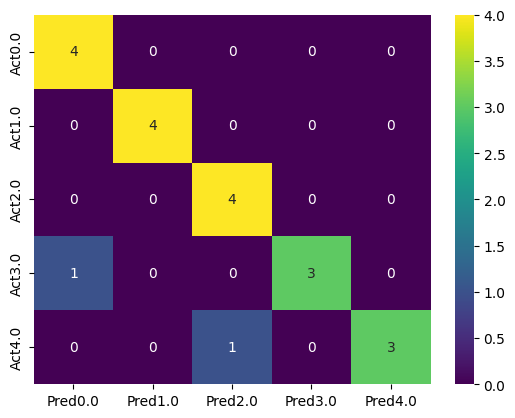

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn


def plot_ConfM(ytest,ypredict):
  labels = unique_labels(Y_test)
  col = [f'Pred{lab}' for lab in labels]
  row = [f'Act{lab}' for lab in labels]

  table = pd.DataFrame(confusion_matrix(ytest,ypredict) , columns=col , index=row)

  return seaborn.heatmap(table , annot=True, fmt ='d' , cmap='viridis')

plot_ConfM(Y_test,Y_prediction)

In [ ]:
#model.save('/content/drive/MyDrive/Ear Echo/TF model')

1/1 [==============================] - 0s 27ms/step - loss: 0.0394 - accuracy: 1.0000


(0.0, 1.1)

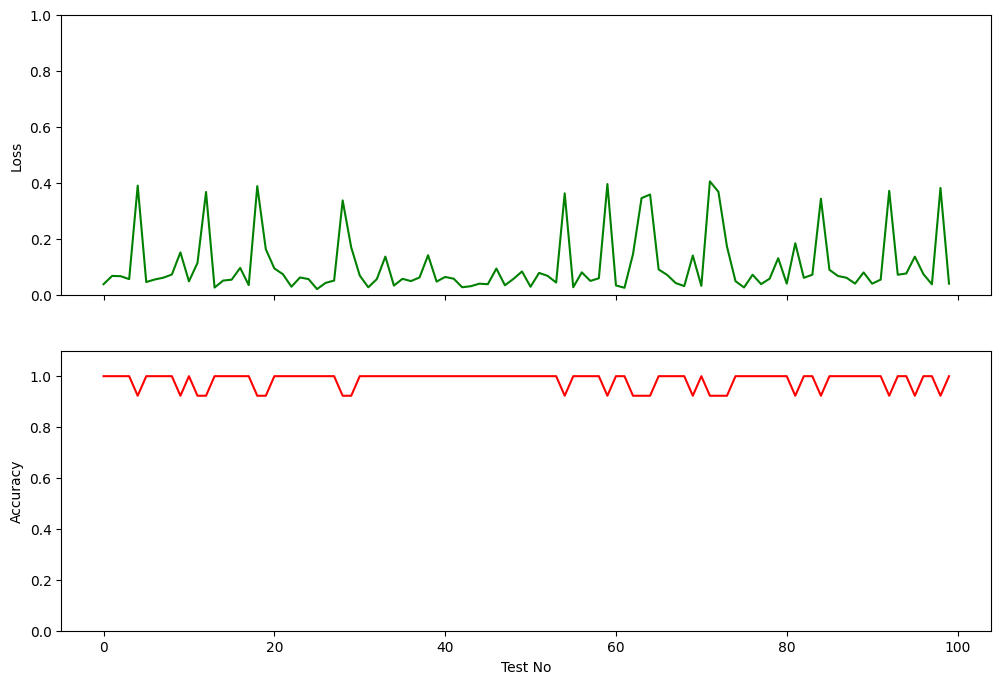

In [ ]:
TestSet = []
for t in range(100):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.1 ,stratify=Y, random_state=t)

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  loss, accuracy = model.evaluate(X_test,Y_test)
  TestSet.append((t,loss,accuracy))


res = np.array(TestSet).T
fig, axs = plt.subplots(2, 1,figsize=(12,8), sharex=True)

axs[0].plot(res[0],res[1],color='green')
axs[0].set_ylabel("Loss")
axs[0].set_ylim(0,1)

axs[1].plot(res[0],res[2],color='red')
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Test No")
axs[1].set_ylim(0,1.1)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Ear Echo/TF model')
new_model.evaluate(X_check,Y_check)

1/1 [==============================] - 0s 127ms/step - loss: 0.6674 - accuracy: 0.7500


[0.6673921346664429, 0.75]